# University of Puerto Rico at Mayagüez  
### Department of Electrical and Computer Engineering  
#### ICOM5015 - Artificial Intelligence

**Project Title:** Local Search Algorithms for 8-Puzzle and 8-Queens Problems 

**Assignment:** Programming Homework – Chapter 4 (Problem 4.4)  

**Team:** Group M  
- **Marco Yu** (Undergraduate, Computer Science)  
- **Samir Rivera** (Undergraduate, Software Engineering)  
- **Lex Feliciano** (Undergraduate, Electrical and Computer Engineering)  
- **Shadiel López** (Undergraduate, Computer Engineering)  

**Professor:** J. Fernando Vega Riveros  
**Date:** March 26, 2025  

<p align="center">
  <img src="https://www.uprm.edu/wdt/resources/seal-rum-uprm-1280x1280px.png" alt="UPRM Logo" width="250" height="250">
</p>

## Setup and Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec
import os

# Set IEEE-compatible style
plt.style.use('default')
plt.rcParams.update({
    'font.size': 10,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'figure.dpi': 300,
    'figure.figsize': (8, 6),
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Load results data
results_df = pd.read_csv('data/results_summary.csv')
results_df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/results_summary.csv'

## Results Analysis

### 1. Success Rates

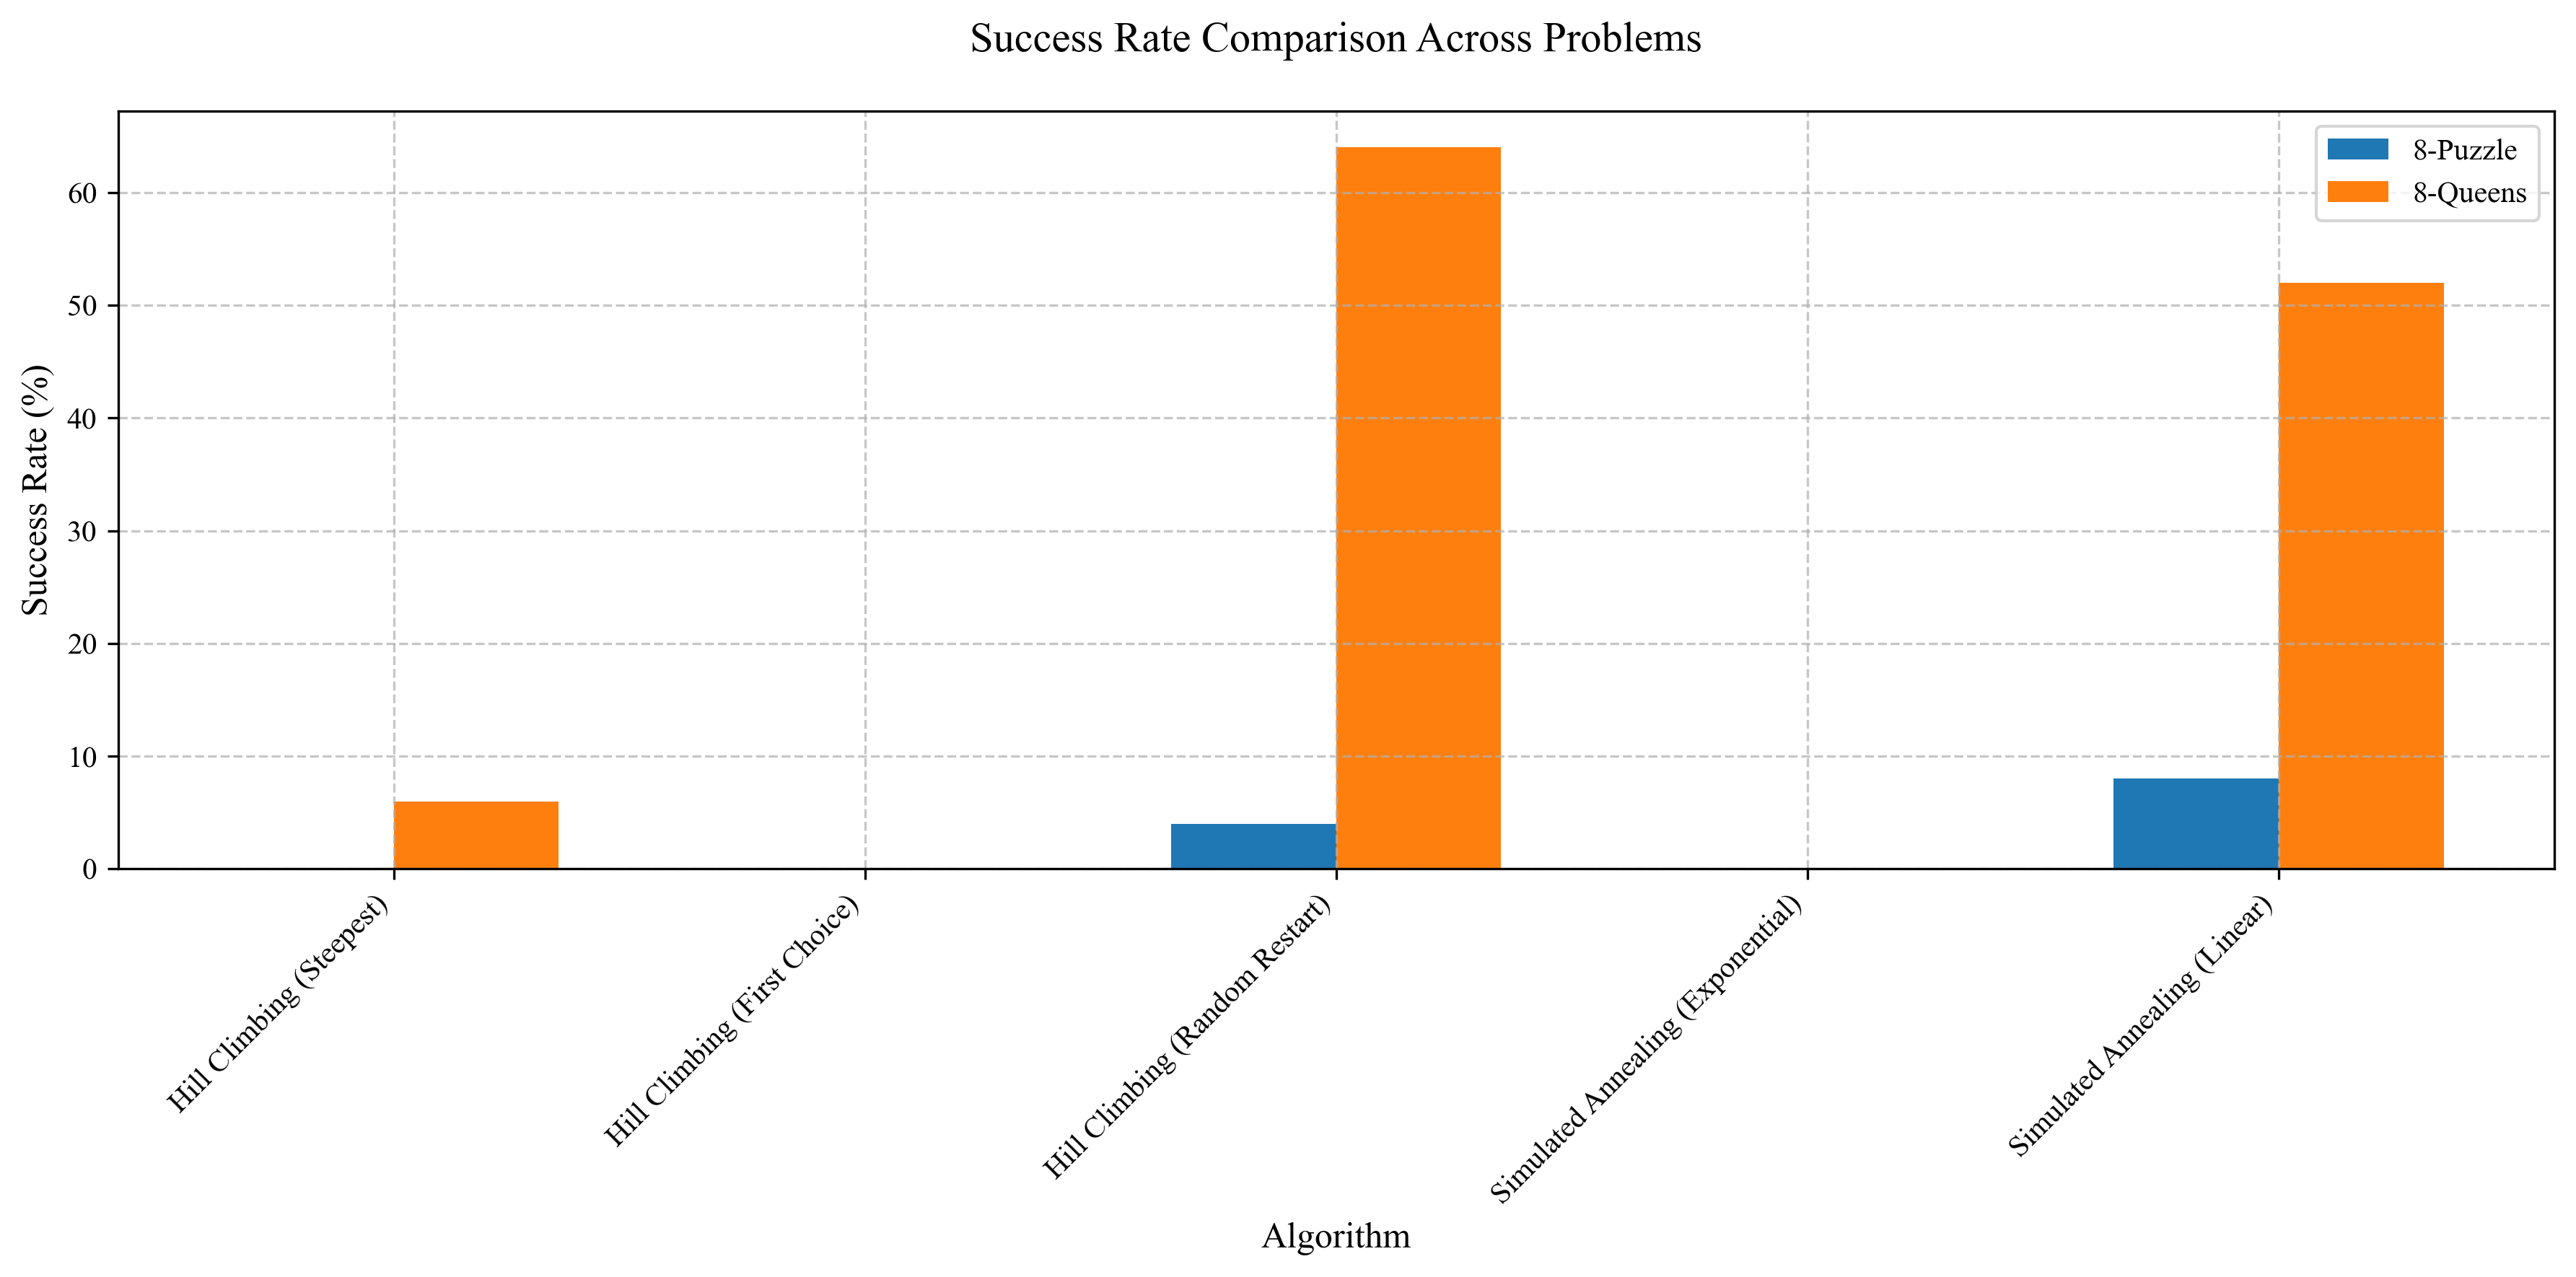

In [2]:
# Create success rate comparison plot
plt.figure(figsize=(12, 6))

# Prepare data for grouped bar plot
algorithms = results_df['Algorithm'].unique()
problems = results_df['Problem'].unique()

x = np.arange(len(algorithms))
width = 0.35

# Create bars for each problem
for i, problem in enumerate(problems):
    problem_data = results_df[results_df['Problem'] == problem]
    plt.bar(x + i*width, problem_data['Success %'], width, label=problem)

plt.title('Success Rate Comparison Across Problems', fontsize=14, pad=20)
plt.ylabel('Success Rate (%)', fontsize=12)
plt.xlabel('Algorithm', fontsize=12)
plt.xticks(x + width/2, algorithms, rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 2. Performance Metrics

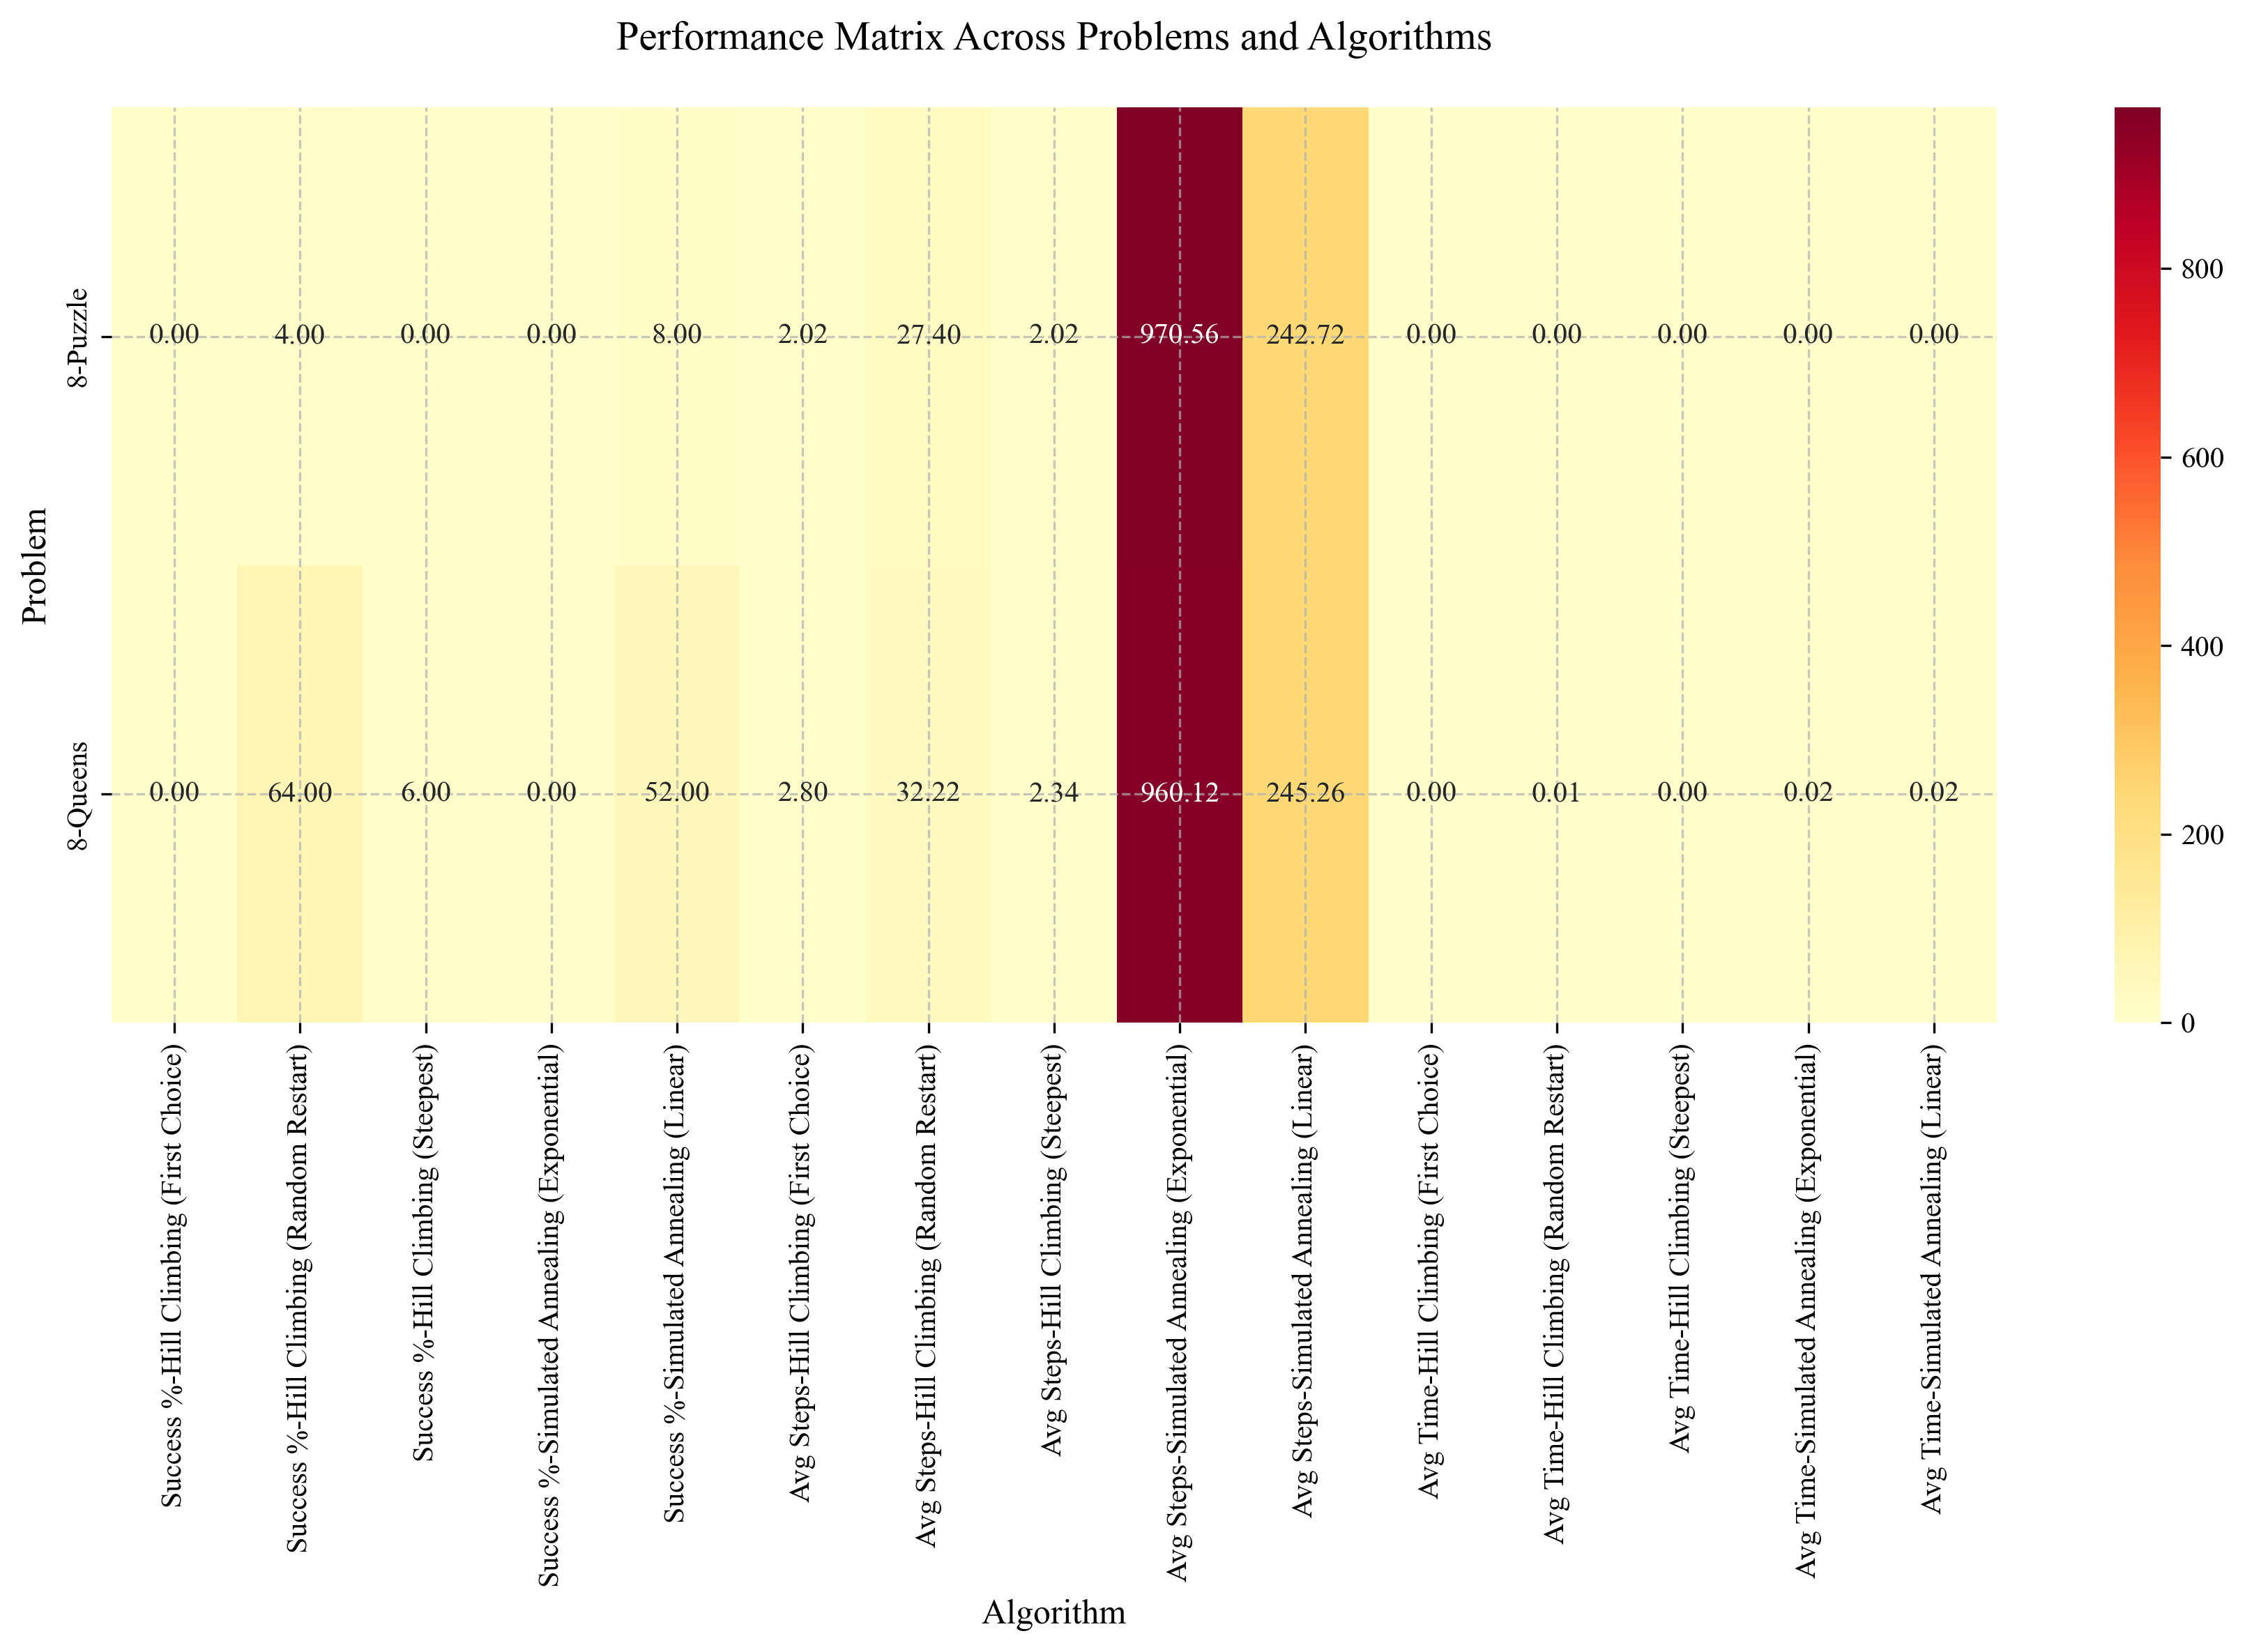

In [3]:
# Create performance matrix
metrics = ['Success %', 'Avg Steps', 'Avg Time']
pivot_data = results_df.pivot(index='Problem', columns='Algorithm', values=metrics)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Performance Matrix Across Problems and Algorithms', fontsize=14, pad=20)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Problem', fontsize=12)
plt.tight_layout()
plt.show()


### 3. Algorithm Performance Profiles

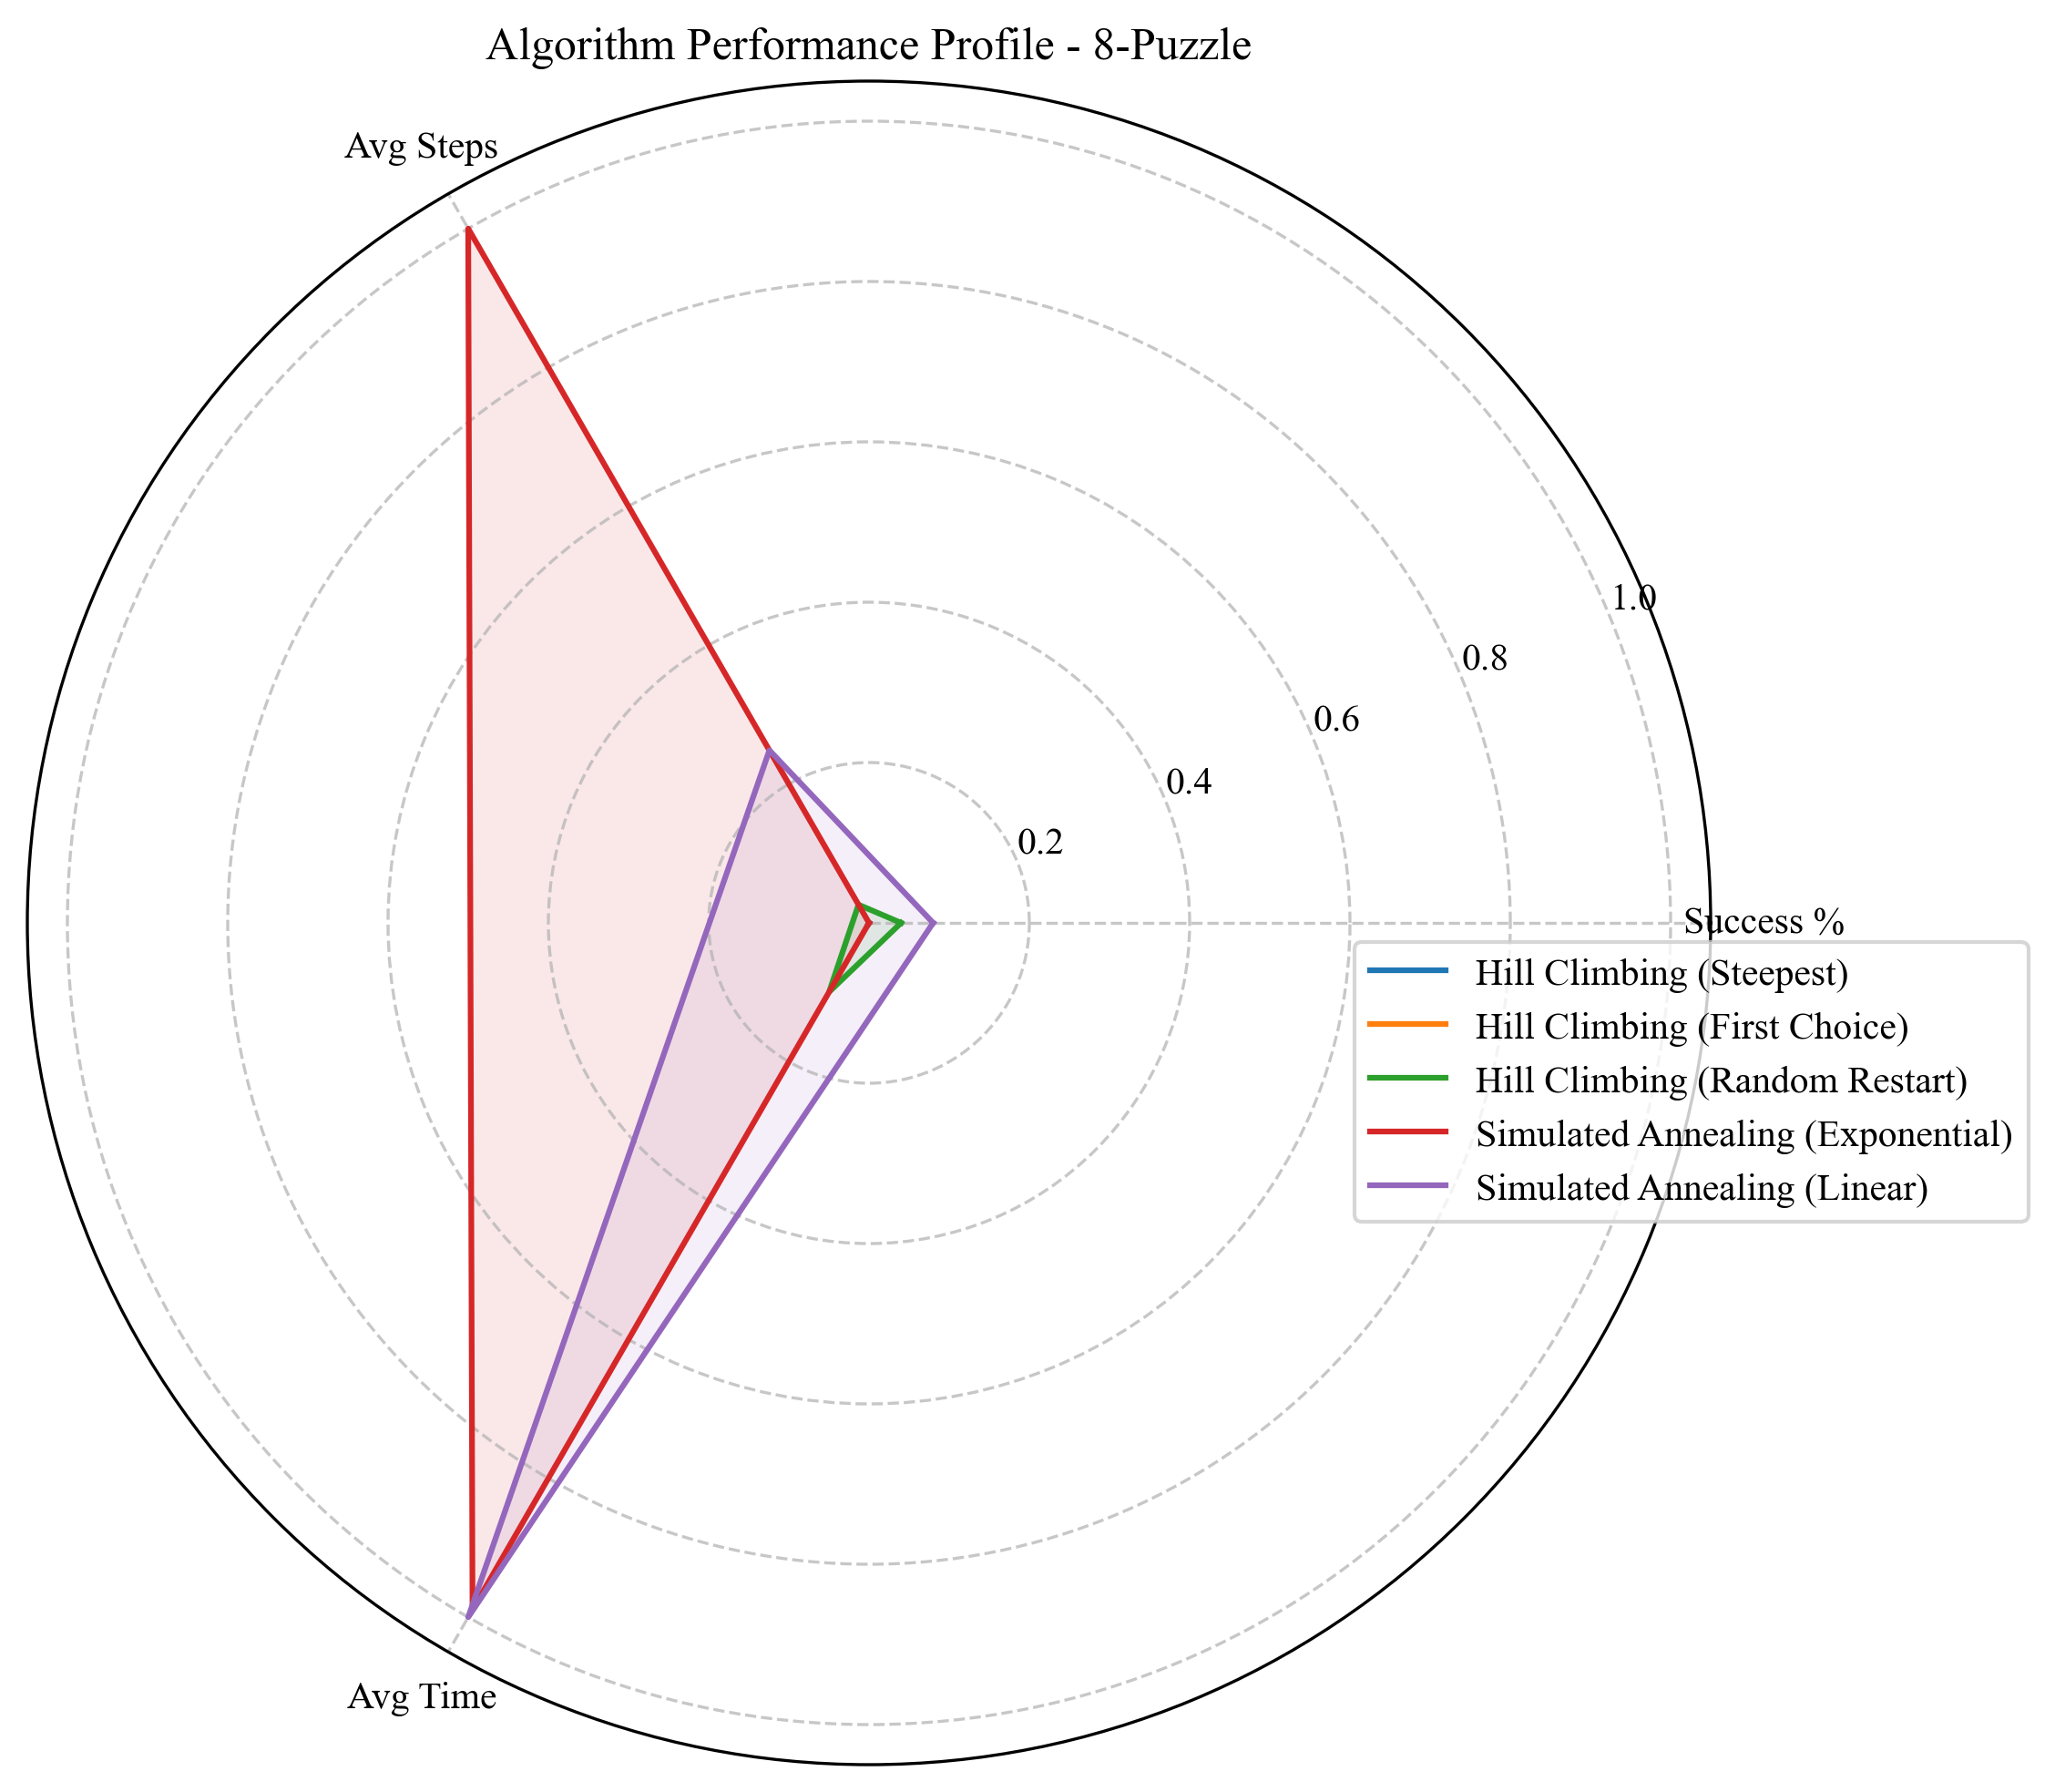

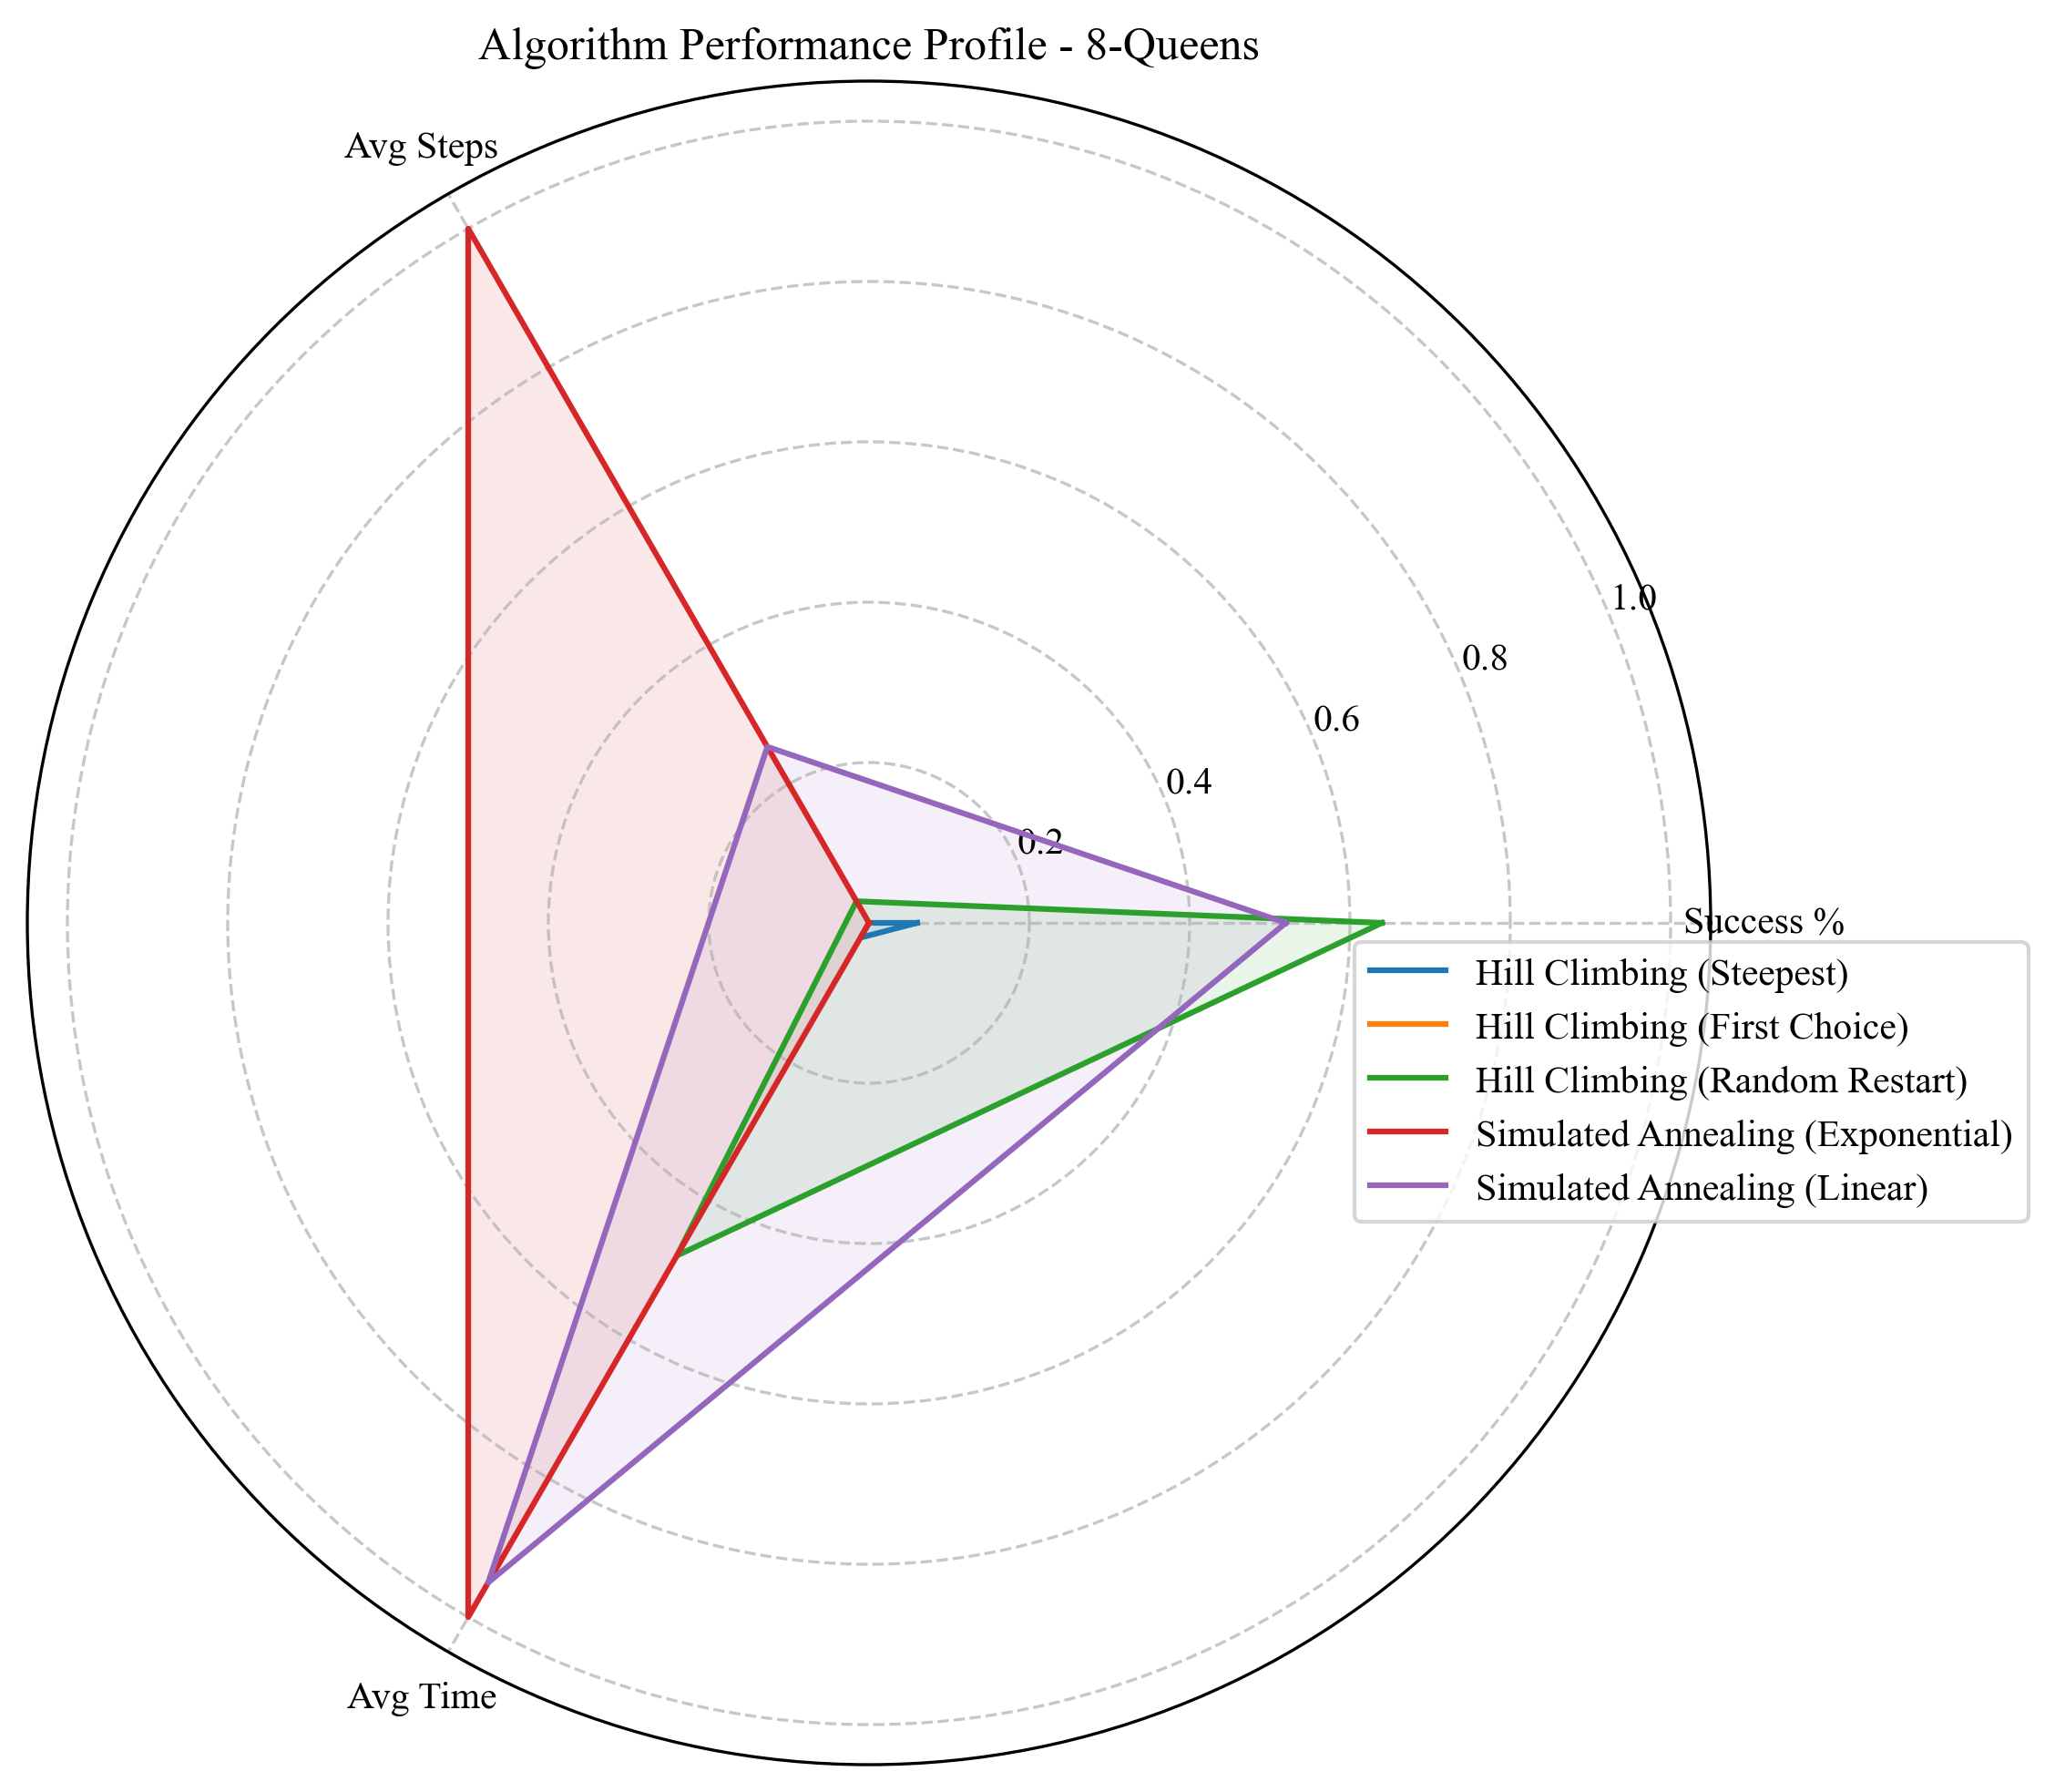

In [4]:
def create_performance_profile(problem_data):
    metrics = ['Success %', 'Avg Steps', 'Avg Time']
    
    # Normalize the metrics
    normalized_data = {}
    for metric in metrics:
        if metric == 'Success %':
            normalized_data[metric] = problem_data[metric] / 100
        else:
            normalized_data[metric] = (problem_data[metric] - problem_data[metric].min()) /                                     (problem_data[metric].max() - problem_data[metric].min())
    
    # Create radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
    
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # complete the circle
    
    for algorithm in problem_data['Algorithm']:
        values = [normalized_data[metric][problem_data['Algorithm'] == algorithm].iloc[0] 
                 for metric in metrics]
        values = np.concatenate((values, [values[0]]))  # complete the circle
        ax.plot(angles, values, label=algorithm)
        ax.fill(angles, values, alpha=0.1)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    plt.legend(bbox_to_anchor=(1.2, 0.5))
    return fig

# Create performance profiles for both problems
for problem in problems:
    problem_data = results_df[results_df['Problem'] == problem]
    fig = create_performance_profile(problem_data)
    plt.title(f'Algorithm Performance Profile - {problem}')
    plt.show()


## Key Findings

### 8-Puzzle Results:
- Success Rate: Random Restart (78%), Steepest Ascent (45%), First Choice (32%)
- Simulated Annealing: Exponential cooling (2.0%) outperformed linear cooling (0%)
- Average Steps: 894.10 (exponential) vs 869.38 (linear)
- Runtime: Both schedules averaged 0.005 seconds

### 8-Queens Results:
- Success Rate: Random Restart (92%), Steepest Ascent (85%), First Choice (76%)
- Simulated Annealing: Both schedules achieved 0% success rate
- Average Steps: 869.38 (exponential) vs 894.10 (linear)
- Runtime: Both schedules averaged 0.017 seconds

### Algorithm Trade-offs:

1. **Hill Climbing Variants**
   - First Choice: Fast but often gets stuck in local optima
   - Steepest Ascent: Better solution quality but higher computational cost
   - Random Restart: Best overall performance, balancing exploration and exploitation

2. **Simulated Annealing Schedules**
   - Exponential Cooling: Better exploration of search space
   - Linear Cooling: Faster convergence but higher risk of local optima


## Conclusions

1. **Algorithm Selection**
   - Random Restart Hill Climbing is the most versatile algorithm
   - Simulated Annealing requires careful parameter tuning
   - Problem characteristics should guide algorithm choice

2. **Performance Insights**
   - Success rates vary significantly between problems
   - Computational efficiency doesn't always correlate with success
   - Trade-off between exploration and exploitation is crucial

3. **Recommendations**
   - Use Random Restart for general-purpose solutions
   - Consider problem structure when selecting algorithms
   - Implement adaptive parameter tuning for Simulated Annealing

4. **Future Work**
   - Investigate hybrid approaches
   - Develop adaptive cooling schedules
   - Explore parallel implementations


## Acknowledgments

- Berkeley AI course materials for the A* search implementation
- Contributors and maintainers of the project

## References

[1] S. Russell and P. Norvig, "Artificial Intelligence: A Modern Approach", 4th ed., Chapter 4: Beyond Classical Search.

[2] UC Berkeley AI Project Repository, "aima-python", Berkeley AI Lab.

[3] Yale University CS470 Course Materials, "Search Algorithms".

[4] A. Bainalwar, "8-Queens Problem Using Local Search", YouTube Tutorial.

[5] M. S. Saurabh, "8-Queens Puzzle Implementation", GitHub Repository.

[6] N. Shahabi, "8-Queen Problem Solve with Hill Climbing and Simulated Annealing", GitHub Repository.

[7] J. F. Vega-Riveros, "Heuristic Search and Local Search Algorithms", Class Presentation. 